Code for reproducing figure 4 plots for individual differences and rich/lazy networks


Eleanor Holton 28/03/2025

In [1]:
import sys
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy

# Get notebook's directory and find project root (transfer-interference directory)
try:
    # Try to get notebook path (works in Jupyter)
    notebook_path = Path(__file__).parent if '__file__' in globals() else Path.cwd()
except:
    notebook_path = Path.cwd()

# Navigate up to find project root (directory containing 'src' and 'data')
project_root = Path(notebook_path).resolve()
while not (project_root / 'src').exists() or not (project_root / 'data').exists():
    if project_root == project_root.parent:  
        # If we can't find it, assume we're in notebooks folder
        project_root = Path(__file__).parent.parent if '__file__' in globals() else Path.cwd().parent
        break
    project_root = project_root.parent

# Add project root to Python path
sys.path.insert(0, str(project_root))

# Setup figure output path
figure_path = project_root / 'figures/figure4_individual_differences'
os.makedirs(figure_path, exist_ok=True)

# Create matplotlib cache directory and clear font cache to pick up font changes
try:
    cache_dir = Path.home() / '.cache' / 'matplotlib'
    cache_dir.mkdir(parents=True, exist_ok=True)
    matplotlib.font_manager._load_fontmanager(try_read_cache=False)
except Exception as e:
    print(f"Note: Could not clear font cache: {e}")


from src.analysis import participant, ann, stats
from src.utils import figure_utils
from src.utils.figure_settings import schedule_colours, task_colours, cm_conv, med_fontsize, condition_order

import importlib
importlib.reload(ann)
importlib.reload(participant)
importlib.reload(figure_utils)
importlib.reload(stats)

<module 'src.analysis.stats' from '/home/kathrin/workspace/Structure-Function-Analysis-of-Network-Topologies/transfer-interference/src/analysis/stats.py'>

In [2]:
# Import data

participant_trial_df = pd.read_csv(project_root / 'data/participants/trial_df.csv')
participant_group_df = pd.read_csv(project_root / 'data/participants/human_vonmises_fits.csv')
rich_trial_data = ann.load_ann_data(project_root / 'data/simulations/rich_50')
lazy_trial_data = ann.load_ann_data(project_root / 'data/simulations/lazy_50')
rich_group_params = pd.read_csv(project_root / 'data/simulations/rich_50_vonmises_fits.csv')
lazy_group_params = pd.read_csv(project_root / 'data/simulations/lazy_50_vonmises_fits.csv')


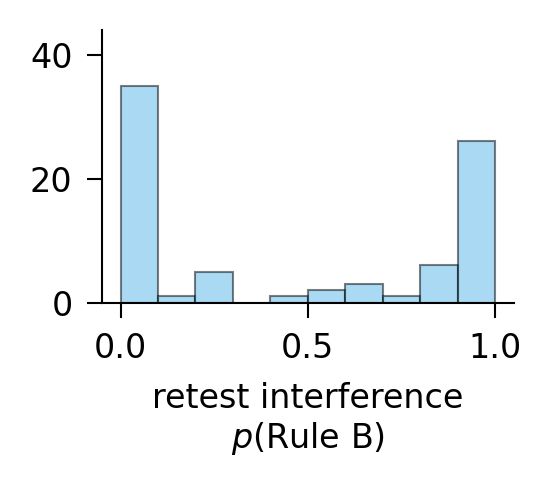

In [3]:
# Histogram of near data 

# select near data only 
participant_group_df = participant_group_df.loc[(participant_group_df['B_LL_B']>participant_group_df['A_LL_B']),:]
near_participants_trial = participant_trial_df[participant_trial_df['condition'] == 'near'].copy().reset_index(drop=True)
near_participants_group = participant_group_df[participant_group_df['condition'] == 'near'].copy().reset_index(drop=True)

near_rich = rich_trial_data['near'].copy()
near_lazy = lazy_trial_data['near'].copy()


fig,ax=figure_utils.plot_near_hist(near_participants_group, schedule_colours)
fig.savefig(
    os.path.join(figure_path, f'fig4A_near_hist.png'),
    dpi=500, bbox_inches="tight")

In [4]:
# Individual behavioural metrics

near_participants_group = participant.add_behav_metrics(near_participants_group, near_participants_trial)
ann_behav_df= ann.add_ann_metrics(rich_trial_data['near'], lazy_trial_data['near'],rich_group_params.loc[rich_group_params['condition']=='near'], lazy_group_params.loc[lazy_group_params['condition']=='near'])

grouped_df_all = pd.concat([near_participants_group, ann_behav_df]).reset_index(drop=True)
# Add ann column to identify source of data
grouped_df_all['ann'] = grouped_df_all['participant'].apply(lambda x: 1 if 'sim_' in str(x) else 0)


interference results

humans
t-test: -31.775475785816397, p=2.179579070571914e-46, df=78
Cohen's d: -7.1542700026918995

Human data:
Splitters: M=0.077, SE=0.015
Lumpers: M=0.901, SE=0.021

ANNs
t-test: -32.88342768680865, p=1.332239815716665e-82, df=200
Cohen's d: -4.650418941199973

ANN data:
Lazy: M=0.216, SE=0.024
Rich: M=1.000, SE=0.000

transfer_error_diff results

humans
t-test: -3.9533405027570345, p=0.00016830163622307448, df=78
Cohen's d: -0.8988956895099797

Human data:
Splitters: M=-0.210, SE=0.028
Lumpers: M=-0.056, SE=0.027

ANNs
t-test: -17.862603456542942, p=2.725228686879203e-43, df=200
Cohen's d: -2.5261536067535557

ANN data:
Lazy: M=-0.407, SE=0.013
Rich: M=-0.166, SE=0.001

generalisation_acc results

humans
t-test: -2.7384929855018383, p=0.007644205593184008, df=78
Cohen's d: -0.62599666114004

Human data:
Splitters: M=0.690, SE=0.035
Lumpers: M=0.811, SE=0.026

ANNs
t-test: -17.151170602104134, p=3.785133204630449e-41, df=200
Cohen's d: -2.4255418076070394

ANN 

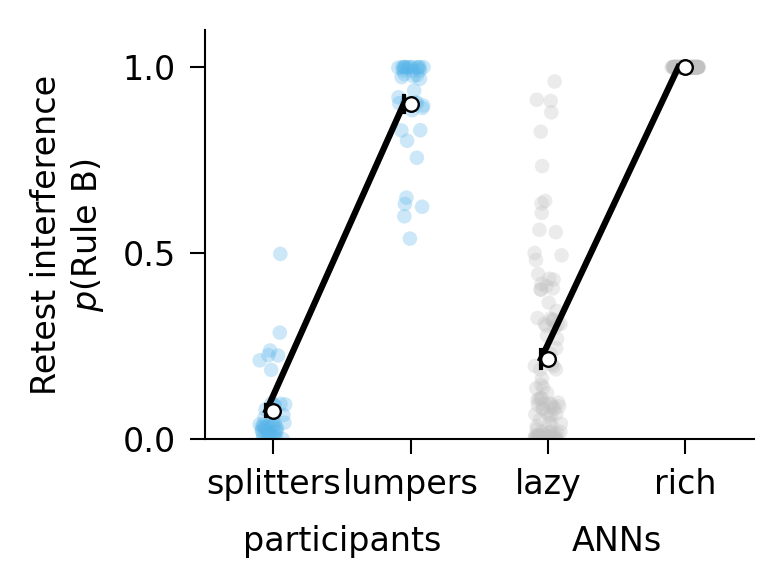

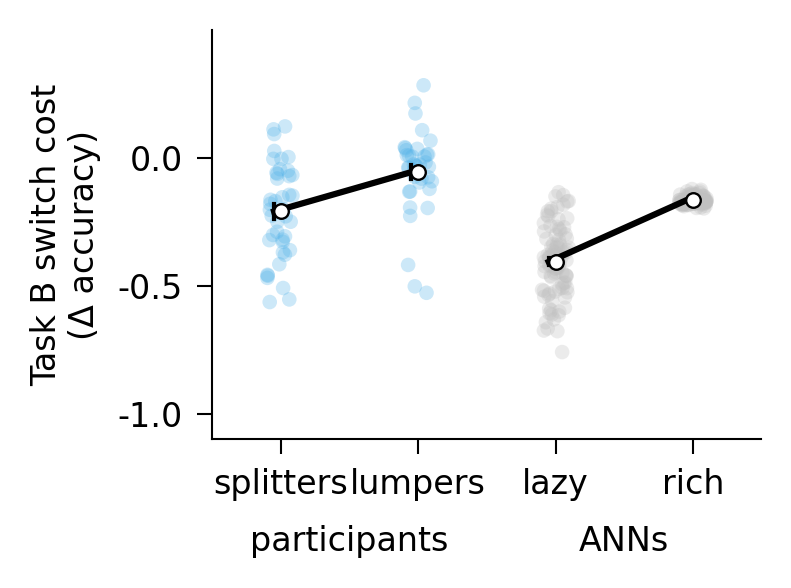

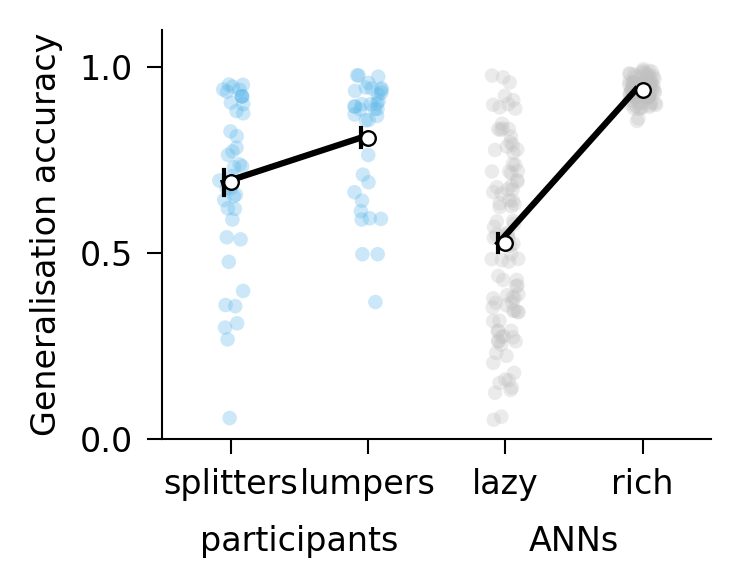

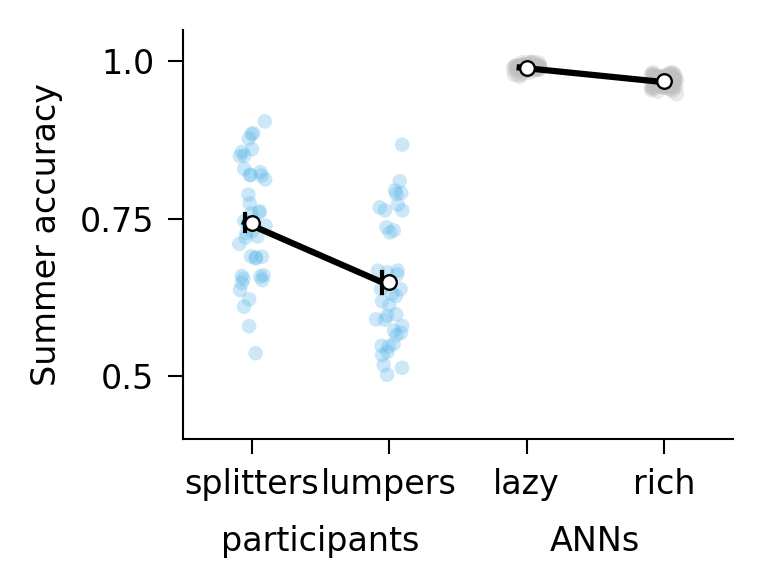

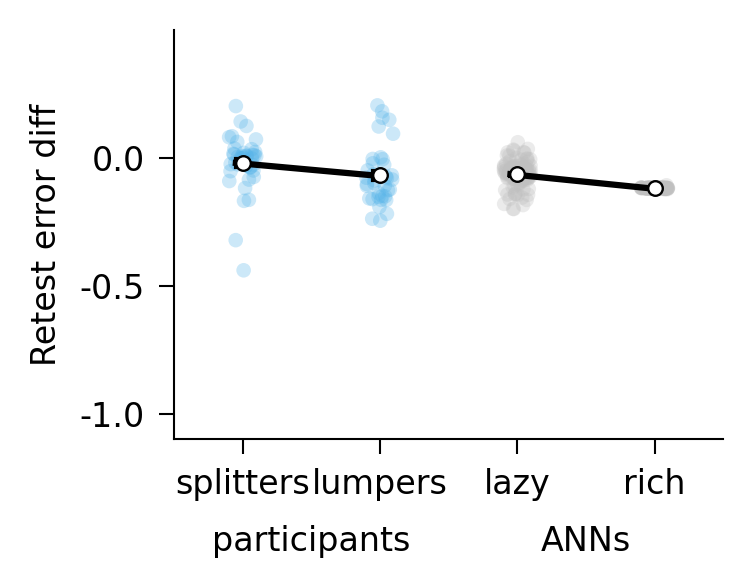

In [5]:
# Plot data ANNs and humans together

variables = ['interference', 'transfer_error_diff', 'generalisation_acc', 'summer_accuracy','retest_error_diff']
ylabels = ['Retest interference\n$\it{p}$(Rule B)', 'Task B switch cost\n(Δ accuracy)', 'Generalisation accuracy', 'Summer accuracy','Retest error diff']
letter = ['B', 'C', 'D', 'E','supp']

yticks = [np.arange(0,1.1,0.5), np.arange(-1,0.3,0.5), np.arange(0,1.1,0.5), np.arange(0.5,1.1,0.25),np.arange(-1,0.3,0.5)]
ytick_labs = [np.arange(0,1.1,0.5), np.arange(-1,0.3,0.5), np.arange(0,1.1,0.5), np.arange(0.5,1.1,0.25),np.arange(-1,0.3,0.5)]
ylims = [[0,1.1], [-1.1,0.5], [0,1.1], [0.4,1.05],[-1.1,0.5]]

indiv_diff_colors = [schedule_colours[1],'#C0C0C0']

for idx, (var, ytick, ytick_lab, ylim, ylab,letter) in enumerate(zip(variables, yticks, ytick_labs, ylims, ylabels,letter)): 
    
    print(f'\n{var} results\n\nhumans')

    stats.behav_group_comparisons(grouped_df_all, var)

    fig,ax = figure_utils.plot_id_groups(data=grouped_df_all, grouping='group', group_order= ['splitters','lumpers','lazy','rich'], group_names = ['splitters','lumpers','lazy','rich'], var=var, yticks=ytick, ytick_labs = ytick_lab, ylim=ylim, ylab=ylab, colors=indiv_diff_colors, add_tests=0,p_value=np.nan,y_coord=np.nan)
    fig.savefig(
    os.path.join(figure_path, f'fig4{letter}_{var}_both.png'),
    dpi=500, bbox_inches="tight")


summer_accuracy results

humans
t-test: 4.44928994258739, p=2.826331034010654e-05, df=78
Cohen's d: 1.0069454223084164

Human data:
Splitters: M=0.744, SE=0.014
Lumpers: M=0.649, SE=0.016

ANNs
t-test: 24.234514676147, p=2.005030791626739e-61, df=200
Cohen's d: 3.4272779332536905

ANN data:
Lazy: M=0.990, SE=0.000
Rich: M=0.968, SE=0.001

correct_afc results

humans
t-test: 3.686115635839731, p=0.00041873046601834574, df=78
Cohen's d: 0.8241181104471651

Human data:
Splitters: M=90.179, SE=1.850
Lumpers: M=75.548, SE=3.639

ANNs
t-test: nan, p=nan, df=200
Cohen's d: nan

ANN data:
Lazy: M=nan, SE=nan
Rich: M=nan, SE=nan


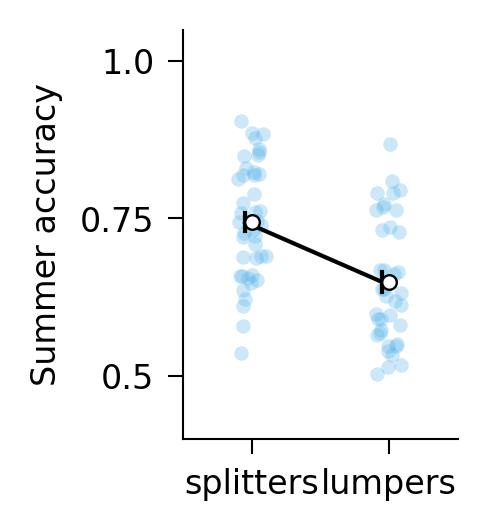

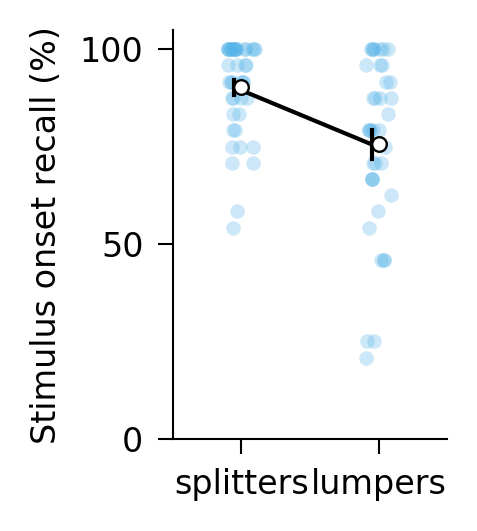

In [6]:
# Plot data humans alone


variables = ['summer_accuracy','correct_afc']
ylabels = ['Summer accuracy','Stimulus onset recall (%)']
letter = ['E','F']

yticks = [np.arange(0.5,1.1,0.25),[0,50,100]]
ytick_labs = [np.arange(0.5,1.1,0.25),[0,50,100]]
ylims = [[0.4,1.05],[0,105]]

for idx, (var, ytick, ytick_lab, ylim, ylab,letter) in enumerate(zip(variables, yticks, ytick_labs, ylims, ylabels,letter)): 
    
    print(f'\n{var} results\n\nhumans')

    stats.behav_group_comparisons(grouped_df_all, var)
    
    fig,ax = figure_utils.plot_id_1group(data=grouped_df_all, grouping='group', group_order= ['splitters','lumpers'], group_names = ['splitters','lumpers'], var=var, yticks=ytick, ytick_labs = ytick_lab, ylim=ylim, ylab=ylab, colors=schedule_colours[1], add_tests=0,p_value=np.nan,y_coord=np.nan)
    fig.savefig(
    os.path.join(figure_path, f'fig4{letter}_{var}.png'),
    dpi=500, bbox_inches="tight")
